In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser

In [104]:
pd.set_option('display.max_rows', 100)

In [4]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

## Open data

In [6]:
source = pd.read_csv("./tables/table.csv",low_memory=False)

## Select clean data

In [7]:
data = source[source.missing == 0].reset_index(drop=True)
data['date'] = pd.to_datetime(data['date'])
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month
data['year-month'] = data.date.dt.year.apply(str)+"-"+data.date.dt.month.apply(str)
data.to_csv("./tables/table_clean.csv", index = False)

In [8]:
data

,source_leg,cadId,legDes,type,date,id,subtype,cadNomeCompleto,cadSexo,cadDtNascimento,cadProfissao,gpSigla,ceDes,legDes_n,missing,year,month,year-month
0,2,147,II,actP,1982-04-02,80353,ITG,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1982,4,1982-4
1,2,147,II,ini,1981-03-12,30469,J,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1981,3,1981-3
2,2,147,II,ini,1981-03-10,30461,J,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1981,3,1981-3
3,2,147,II,ini,1980-12-11,30367,J,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1980,12,1980-12
4,2,147,II,ini,1980-12-11,30366,J,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1980,12,1980-12
5,2,147,II,ini,1981-05-23,36067,C,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1981,5,1981-5
6,2,147,II,ini,1980-11-21,30938,F,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1980,11,1980-11
7,2,147,II,ini,1980-11-21,30935,F,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1980,11,1980-11
8,2,147,II,ini,1980-11-21,30932,F,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1980,11,1980-11
9,2,147,II,ini,1980-11-21,30931,F,ANTÓNIO DE ALMEIDA SANTOS,M,1926-02-15,JURISTA,PS,PORTO,2,0,1980,11,1980-11


## Visualizations

### Requested

<Figure size 432x288 with 0 Axes>

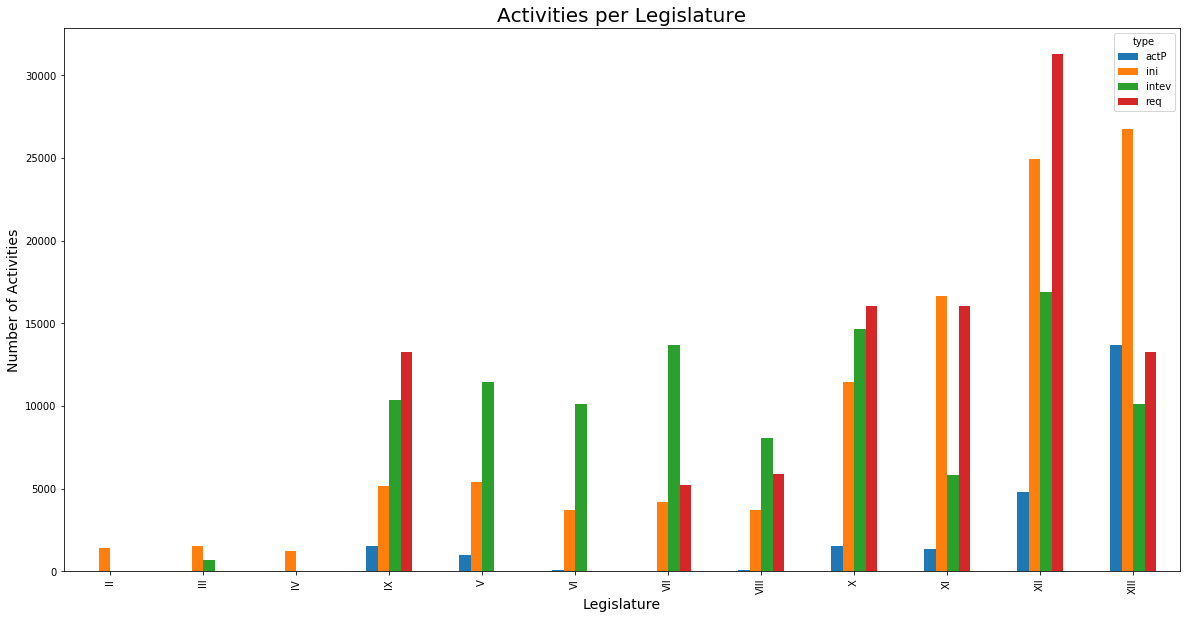

In [27]:
plt.figure()
data.groupby(["legDes",'type'])["type"].count().unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Activities per Legislature", fontsize=20)
plt.ylabel("Number of Activities")
plt.xlabel("Legislature")
plt.show()

<Figure size 432x288 with 0 Axes>

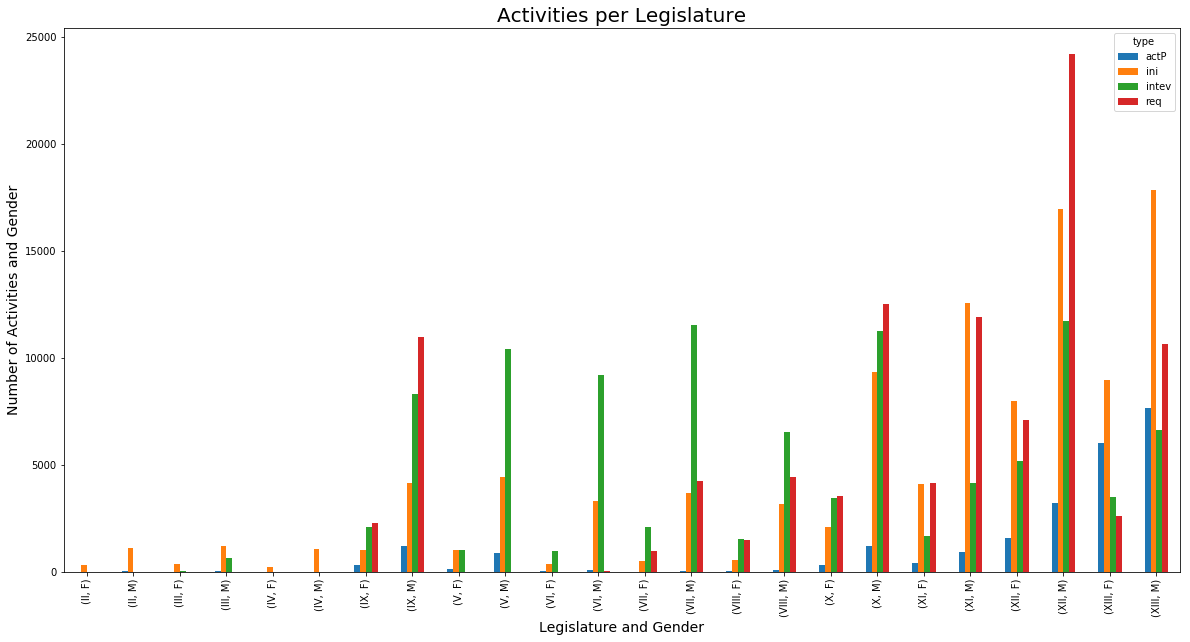

In [30]:
plt.figure()
data.groupby(["legDes","cadSexo",'type'])["type"].count().unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Activities per Legislature", fontsize=20)
plt.ylabel("Number of Activities and Gender")
plt.xlabel("Legislature and Gender")
plt.show()

<Figure size 432x288 with 0 Axes>

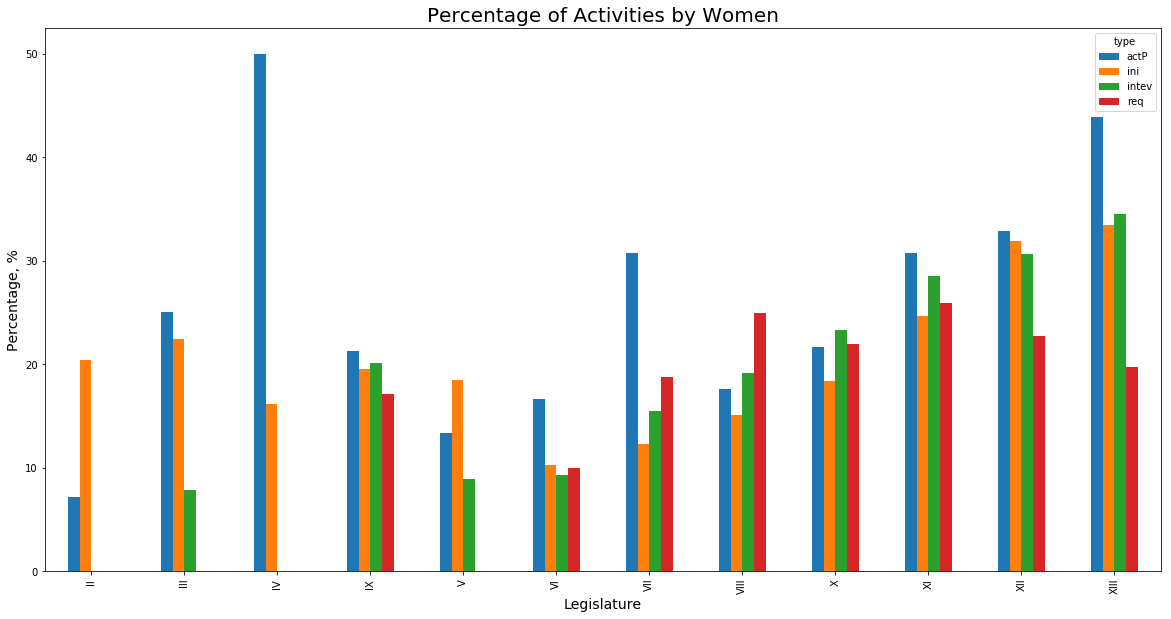

In [50]:
plt.figure()
(data[data.cadSexo == "F"].groupby(["legDes",'type']).type.count().unstack()/data.groupby(["legDes",'type']).type.count().unstack()*100).plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Percentage of Activities by Women", fontsize=20)
plt.ylabel("Percentage, %")
plt.xlabel("Legislature")
plt.show()

### Other

<Figure size 432x288 with 0 Axes>

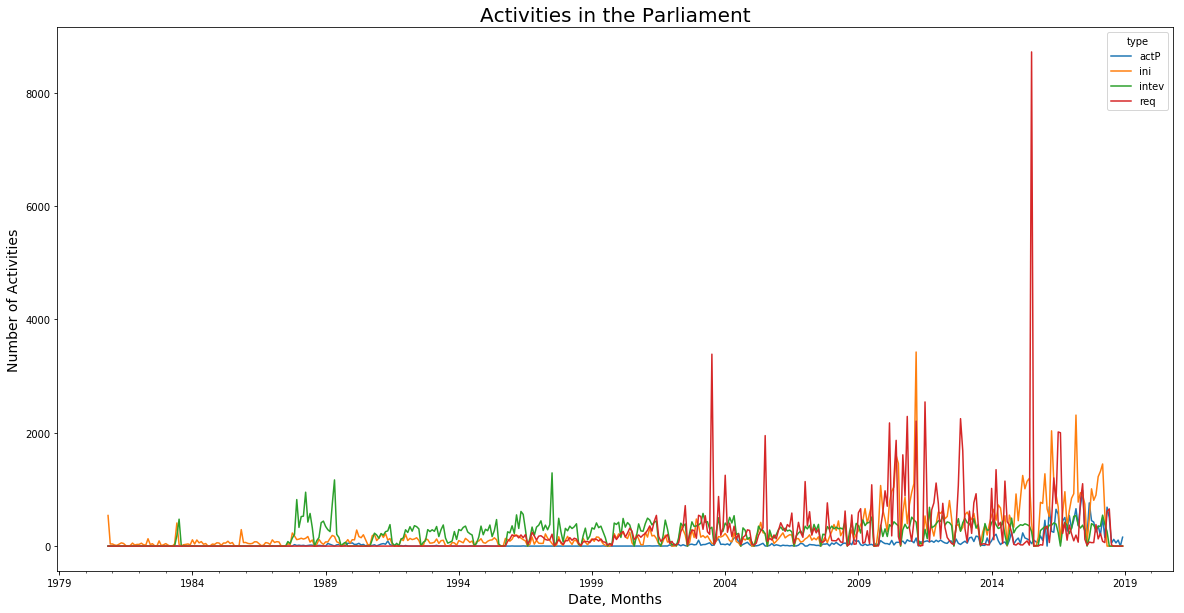

In [10]:
plt.figure()
data.groupby(["date", "type"]).cadId.count().unstack().groupby(pd.Grouper(freq='M')).sum().plot(figsize=(20, 10))
plt.title("Activities in the Parliament", fontsize=20)
plt.ylabel("Number of Activities")
plt.xlabel("Date, Months")
plt.show()

<Figure size 432x288 with 0 Axes>

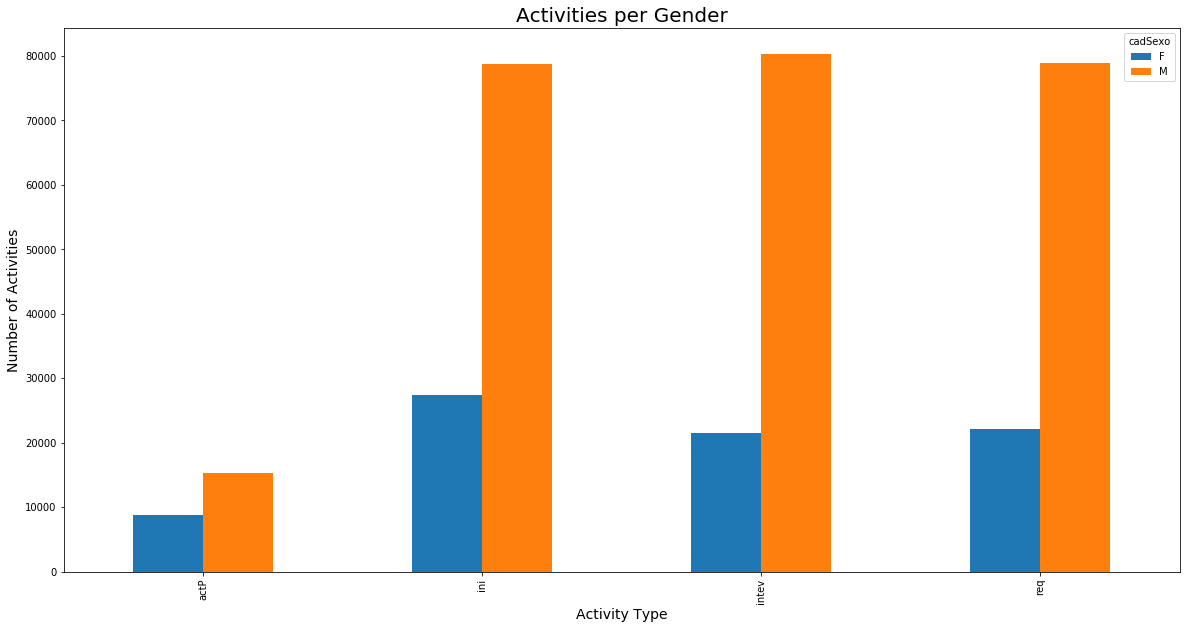

In [11]:
plt.figure()
data.groupby(['type','cadSexo'])['cadSexo'].count().unstack().plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title("Activities per Gender", fontsize=20)
plt.ylabel("Number of Activities")
plt.xlabel("Activity Type")
plt.show()

<Figure size 432x288 with 0 Axes>

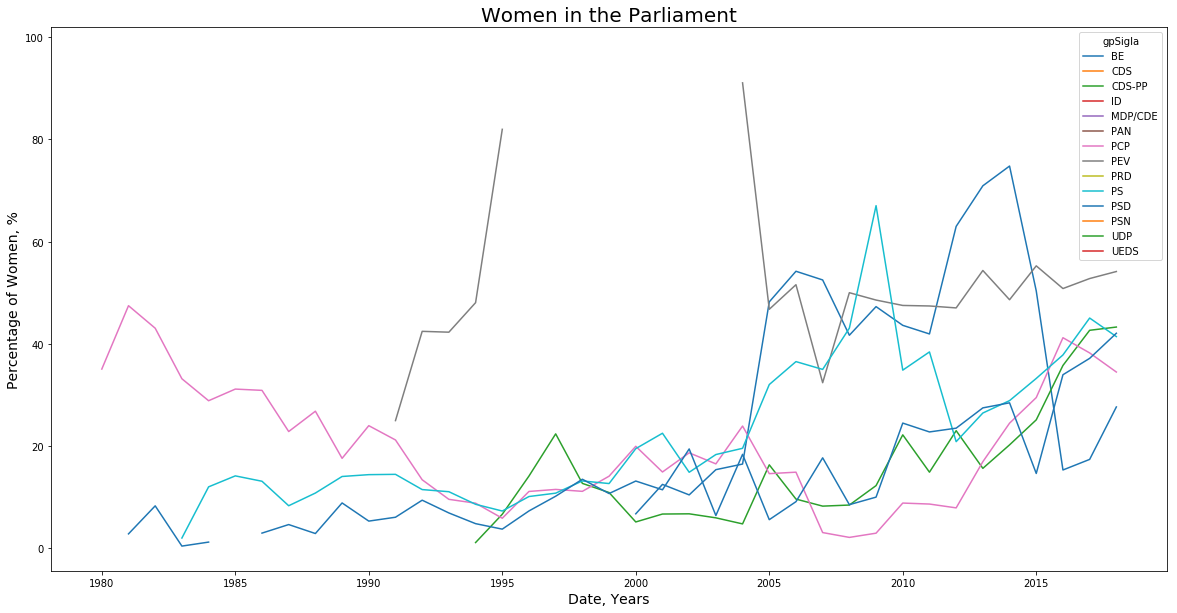

In [12]:
plt.figure()
df_FM = data.groupby(["year", "gpSigla", "cadSexo"]).cadId.count().unstack().copy()
df_FM["pc_F"] = df_FM.F / (df_FM.F+df_FM.M) * 100
df_FM.pc_F.unstack().plot(figsize=(20, 10))
plt.title("Women in the Parliament", fontsize=20)
plt.ylabel("Percentage of Women, %")
plt.xlabel("Date, Years")
plt.show()

<Figure size 432x288 with 0 Axes>

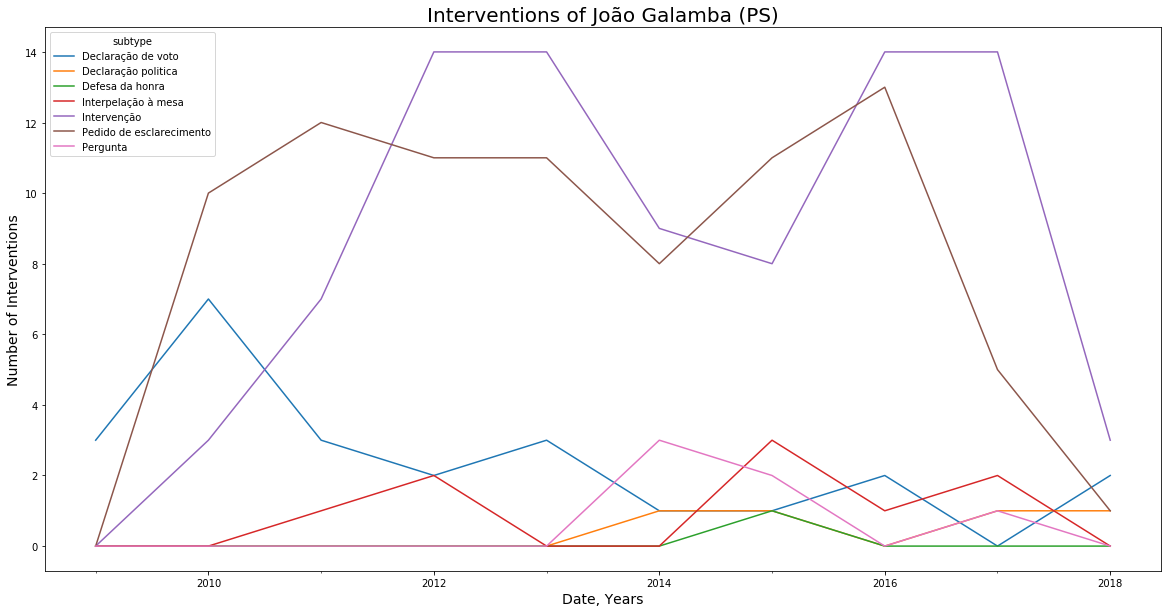

In [13]:
plt.figure()
data[(data.cadNomeCompleto == "JOÃO SALDANHA DE AZEVEDO GALAMBA") & (data.type == "intev")].groupby(["date", "subtype"]).id.count().unstack().groupby(pd.Grouper(freq='Y')).sum().plot(figsize=(20, 10))
plt.title("Interventions of João Galamba (PS)", fontsize=20)
plt.ylabel("Number of Interventions")
plt.xlabel("Date, Years")
plt.show()

<br>

# Missing Values

In [105]:
table_missing = source.groupby(["legDes", "cadSexo", "missing"]).id.count().rename("%")
pd.DataFrame(table_missing / table_missing.groupby(level=0).sum()*100)

%
legDes cadSexo missing           
II     F       0         5.496588
               1         0.398029
               2         6.709629
       M       0        21.626232
               1         4.738438
               2        59.003033
               3         2.028052
III    F       0         6.976744
               2         5.232558
       M       0        31.515048
               1         1.265390
               2        55.010260
IV     F       0         5.712716
               2         2.801428
       M       0        28.783301
               1         0.604230
               2        61.631420
               3         0.466905
IX     F       0        18.583494
               1         0.208693
       M       0        80.353474
               1         0.834774
               2         0.019565
V      F       0         9.002137
               1         0.155065
               2         1.890114
       M       0        65.797745
               1         2.024224
               2        21.009178
               3         0.121537
VI     F       0         6.943080
               1         3.360389
       M       0        65.113995
               1        24.577366
               2         0.005170
VII    F       0        15.058608
               1         1.130438
               2         0.033371
       M       0        81.258082
               1         2.506987
               2         0.012514
VIII   F       0        19.232215
               1         1.642953
               2         0.032215
       M       0        75.892617
               1         3.178523
               2         0.021477
X      F       0        18.484168
               1         2.357042
               2         0.009846
       M       0        67.564587
               1        11.582388
               2         0.001969
XI     F       0        19.065000
               1         6.900048
               2         0.403716
       M       0        54.422446
               1        18.766361
               2         0.442429
XII    F       0        20.750373
               1         8.578686
               2         0.640215
       M       0        53.367072
               1        16.522864
               2         0.140790
XIII   F       0        21.821685
               1        14.514642
               2         1.306235
       M       0        44.313579
               1        18.042823
               2         0.001036